# Multiple Liner Regression

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#load the data set

data = pd.read_csv('house.csv')
data

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176
...,...,...,...,...,...,...,...
4303,9,175.166533,1299.71,217.739012,2,5,102707.356224
4304,6,215.352151,1346.36,77.724676,14,5,99695.064992
4305,5,299.563972,1585.37,235.537881,3,5,93803.715617
4306,1,29.193907,1896.23,147.223827,4,2,92914.729126


In [24]:
data.dtypes

bedroom_count        int64
net_sqm            float64
center_distance    float64
metro_distance     float64
floor                int64
age                  int64
price              float64
dtype: object

# Explore and clean the data. Handle missing values and outliers

In [25]:
# Display the first few rows of the dataset
data.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [26]:
# Display the last few rows of the dataset
data.tail()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
4303,9,175.166533,1299.71,217.739012,2,5,102707.356224
4304,6,215.352151,1346.36,77.724676,14,5,99695.064992
4305,5,299.563972,1585.37,235.537881,3,5,93803.715617
4306,1,29.193907,1896.23,147.223827,4,2,92914.729126
4307,2,54.437573,255.24,25.524020,18,0,93743.047292


In [27]:
# Check for summary statistic
data.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,3.732823,118.941327,1090.544301,105.665358,9.397168,48.576834,95701.196185
std,2.476989,95.469802,555.325830,60.750825,7.517018,27.621465,3919.823988
min,1.000000,10.244518,11.800000,1.245338,1.000000,0.000000,86113.592974
25%,2.000000,52.240659,635.897500,56.156897,2.000000,25.000000,92934.251436
50%,3.000000,91.828201,1143.135000,101.388012,8.000000,48.000000,95337.792918
75%,5.000000,150.987591,1554.280000,148.481068,16.000000,72.000000,97980.675094
max,17.000000,750.971604,1999.840000,330.275317,24.000000,97.000000,118134.771190


In [28]:
# Check for missing data
data.isnull().sum()

bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
price              0
dtype: int64

array([[<Axes: title={'center': 'bedroom_count'}>,
        <Axes: title={'center': 'net_sqm'}>,
        <Axes: title={'center': 'center_distance'}>],
       [<Axes: title={'center': 'metro_distance'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

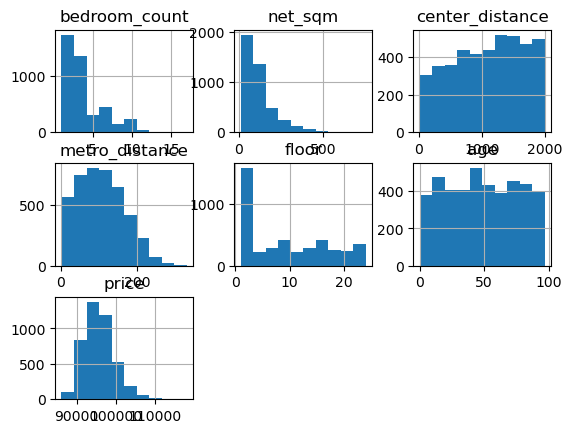

In [45]:
data.hist()

# Assigning X = input features and Y = Response feature

In [56]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [57]:
x.head(2)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
0,1,26.184098,1286.68,204.003817,22,67
1,1,34.866901,1855.25,186.980360,8,30


In [58]:
y.head(2)

0    96004.804557
1    92473.722568
Name: price, dtype: float64

In [59]:
type(x)

pandas.core.frame.DataFrame

# Label Encoding

In [60]:
#from sklearn.preprocessing import LabelEncoder

#label_encoder = LabelEncoder()
#data['Location'] = label_encoder.fit_transform(data['Location'])


# Split the data into training and testing dataset

In [61]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [62]:
xtrain.shape

(3446, 6)

In [63]:
ytrain.shape

(3446,)

In [64]:
data.shape

(4308, 7)

# Build model with Multiple linear regression

In [65]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model

lin_reg = LinearRegression()
print("Training started......\n")
print()
lin_reg.fit(xtrain, ytrain)
print("Training completed")

print("Testing invoked......")
# Make predictions
y_pred = lin_reg.predict(xtest)
print("Predicted price....\n",y_pred)
print("Testing completed")

Training started......


Training completed
Testing invoked......
Predicted price....
 [ 94823.31235225  93547.88099989  94656.4069878   99213.09368674
  93664.7764835   95852.73206058  97338.95631527  97839.81218868
  97761.91508098  97777.3349469   96501.50568877  99125.74284184
  97279.8640116  102160.65950277  95819.33635419  92026.21483418
 100062.20876405  98626.73893676  99872.54389544  91426.08318033
  99589.14878443 105025.77915762  98910.50609985  91363.04922548
  95452.48673051  93988.70977402  96684.13557222  96332.66875704
  95862.13961599  96812.68701193 101431.49297515  97884.79159792
  97267.98695652  94933.56628475  90848.00609461 100753.63186685
  94386.90788689 104958.97255734  92923.09165439  97787.09468124
 108881.42181117  94324.09541716 102793.84580258 105379.50450897
  97669.90305855  97830.63803159  93703.57360234  95133.42984691
  91886.43837851  97077.11989381 100585.75362481  93985.9000094
  95116.35806723  97588.89236212  97563.62457875  95635.57842892
  96

In [66]:
ytest

342     95277.630956
1307    95940.914262
890     93850.237672
3197    99284.291865
3640    92287.943325
            ...     
1814    96701.364094
701     93415.176708
101     96833.309505
2501    93207.684631
1115    89389.249444
Name: price, Length: 862, dtype: float64

In [69]:
diff = ytest - y_pred
diff

342      454.318604
1307    2393.033262
890     -806.169316
3197      71.198179
3640   -1376.833158
           ...     
1814      22.512178
701      147.075075
101     2251.204047
2501     526.872659
1115   -2604.556619
Name: price, Length: 862, dtype: float64

# Visualing the training dataset

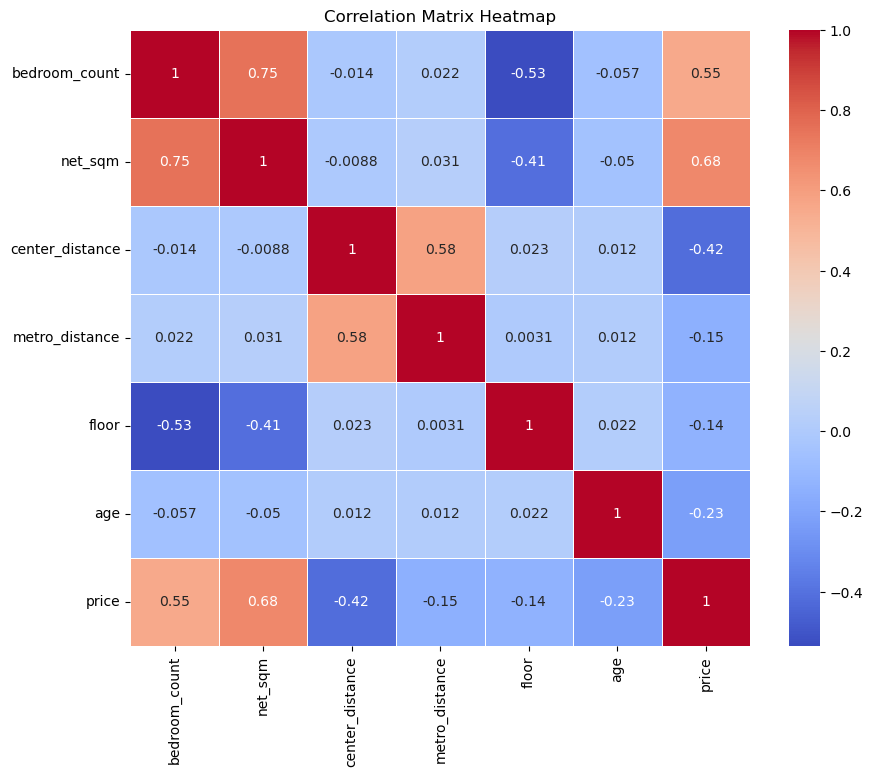

In [71]:
# Correlation

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

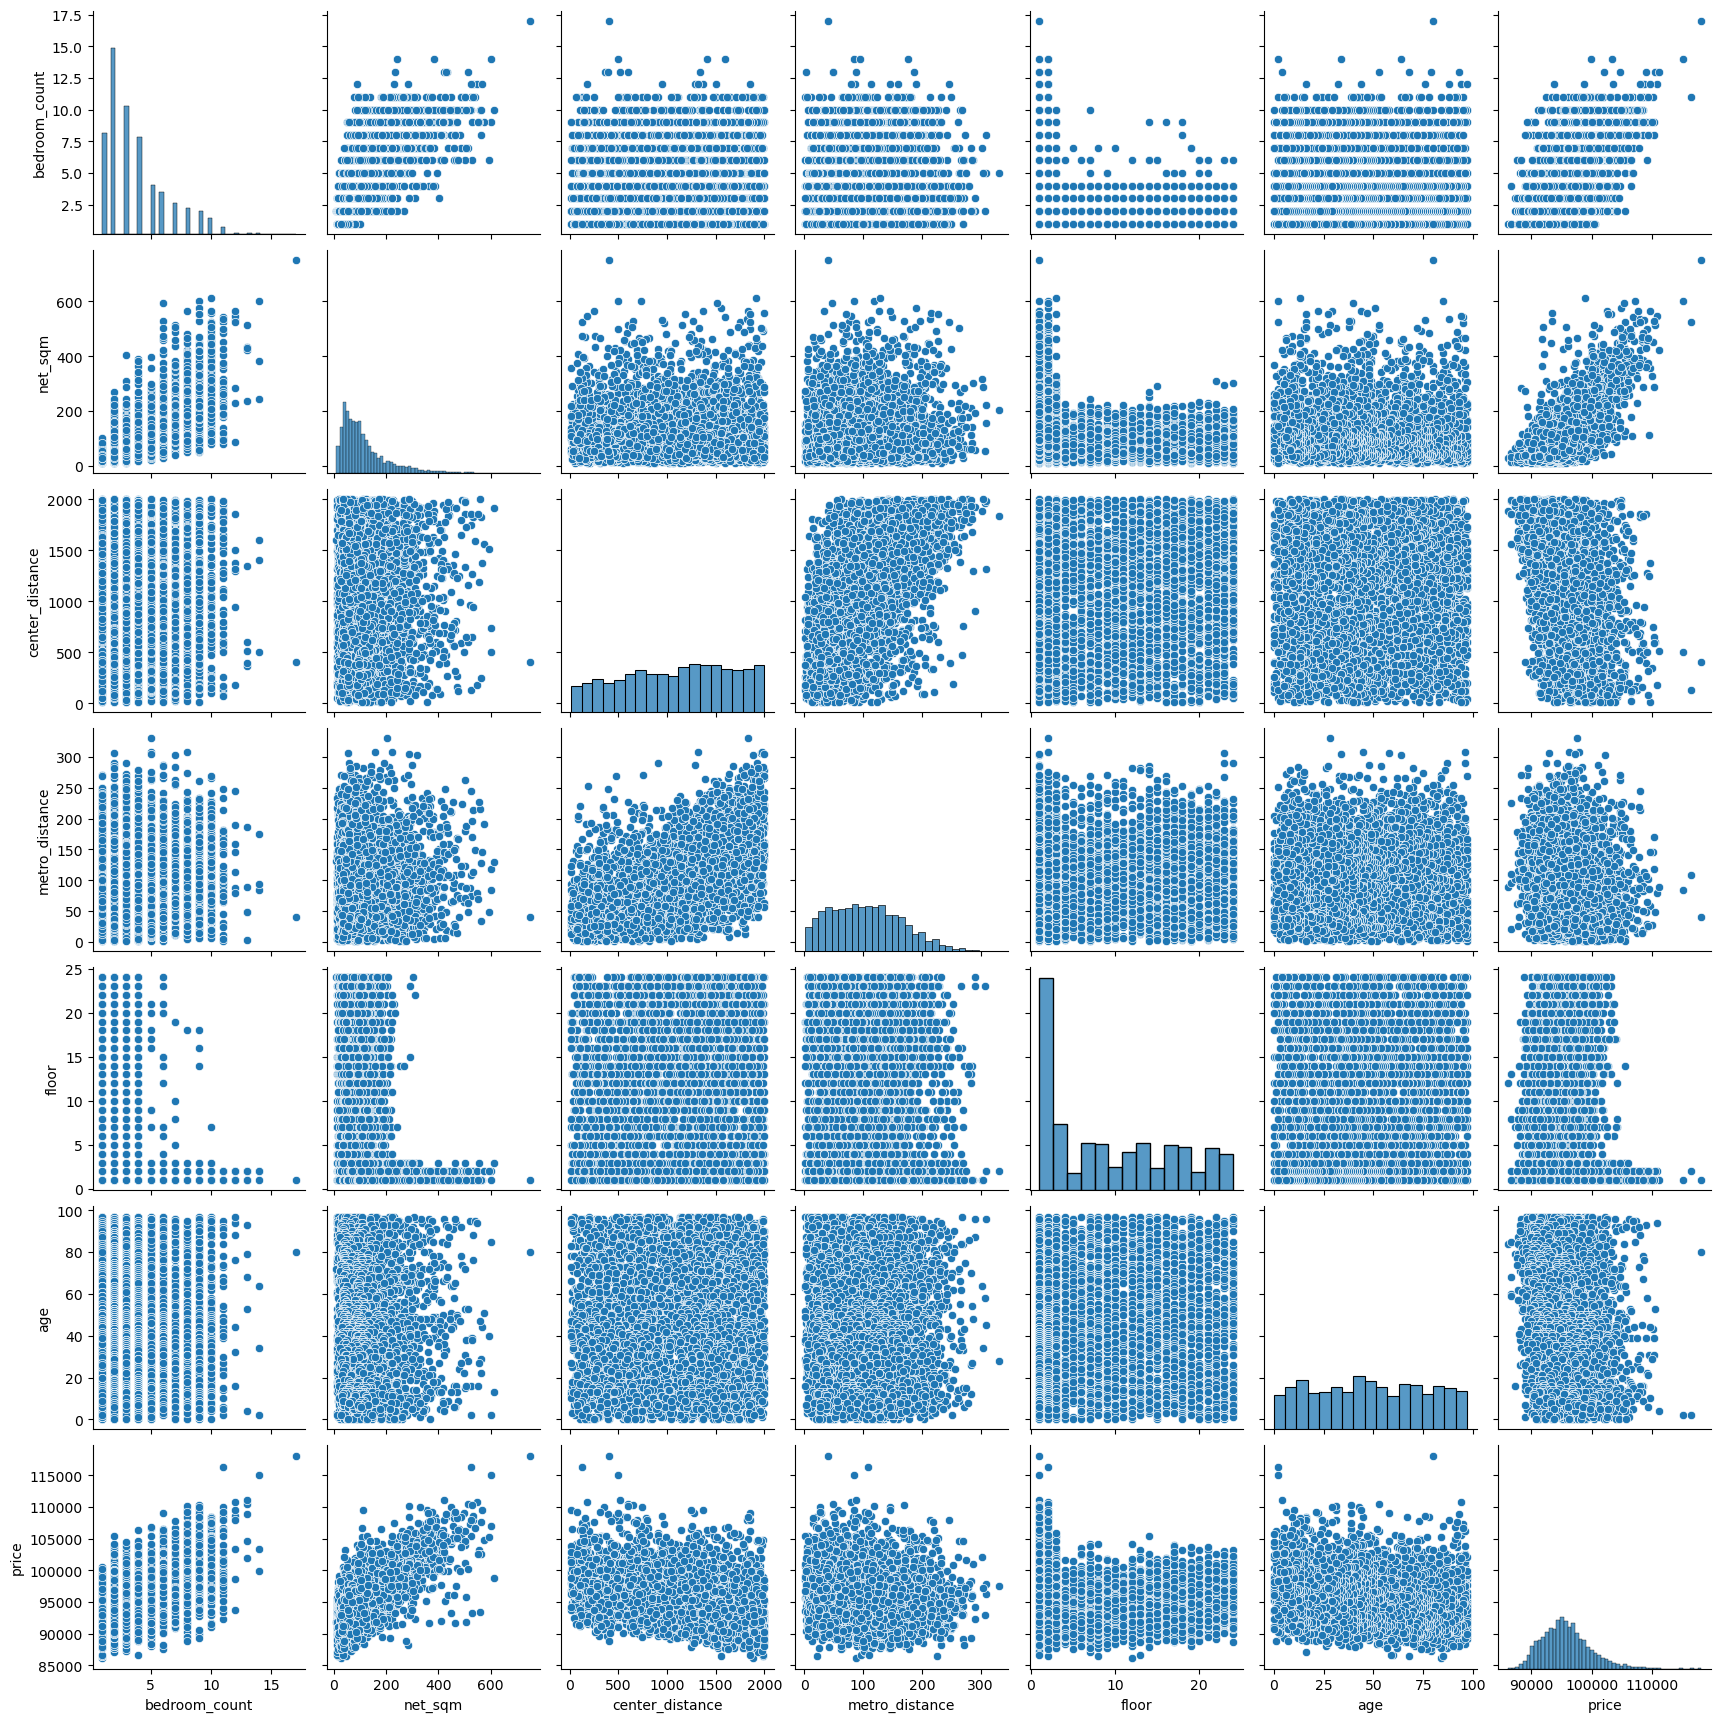

In [44]:
# pair plot
sns.pairplot(data)
plt.show()

# Performace metrics

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("Mean Absolute error\t", mean_absolute_error(ytest,y_pred))
print()
print("Mean Squared error\t", mean_squared_error(ytest,y_pred))
print()
print("Root Mean Squared error \t", np.sqrt(mean_squared_error(ytest,y_pred)))
print()

Mean Absolute error	 1479.2740315382835

Mean Squared error	 4101003.26432735

Root Mean Squared error 	 2025.0933964455442

